In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
mi_data_modalidad = pd.read_csv('data/ModalidadVirtual.csv', parse_dates=["time"])
mi_data_modalidad.head()

,Unnamed: 0,time,carrera,acepta,positivo,negativo,edad,sexo,trabajo
0,0,2020-11-08,Ingeniería de Sistemas,Si,Horario flexible.,Contacto Personal Docente-Estudiantil.,20,Hombre,Eventual
1,1,2020-11-08,Psicología,Si,Acceso desde cualquier lugar.,Contacto Personal Docente-Estudiantil.,26,Hombre,Eventual
2,2,2020-11-08,Ingeniería de Sistemas,Si,Horario flexible.,"Falta de recursos de calidad(plataformas, doce...",20,Mujer,Sí
3,3,2020-11-08,Ingeniería de Sistemas,Si,Horario flexible.,Conexión a internet.,18,Mujer,No
4,4,2020-11-08,Ingeniería de Sistemas,Si,Acceso desde cualquier lugar.,Contacto Personal Docente-Estudiantil.,39,Hombre,Sí


# Creación de un Gráfico de Barras Apiladas
#### Caso:  

Vamos a graficar el total de hombres y mujeres por carrera. Para ello, primero usaremos **Pandas**.

## Con Pandas:
1. **Calculamos el total de hombres y mujeres agrupados por carrera:**
   - Usamos la función **`size()`** para obtener el tamaño de la población.
   - Usamos la función **`unstack()`**, que nos permite separar en columnas los dos tipos de género, ya que ambos están en una sola columna.
2. Asignamos el resultado a una nueva variable, que será el nuevo DataFrame.
3. Renombramos las columnas.

   **Nota:**  
   Al revisar el nuevo DataFrame, veremos que la carrera pasa a ser el índice de este nuevo DataFrame.
4. En una nueva variable, almacenamos las carreras.
5. Creamos una lista con los nombres de las nuevas columnas del DataFrame.

---


In [4]:
#Pandas:
#1,2
df_agrupacion_carrera_genero = mi_data_modalidad.groupby(['carrera', 'sexo']).size().unstack()    
#3
df_agrupacion_carrera_genero.columns = ['Hombre', 'Mujer']

#4
carreras = df_agrupacion_carrera_genero.index

#5
lista_columnas = ['Hombre', 'Mujer']

## Con respecto a la visualización:
### 1. **fig, ax = plt.subplots(figsize=(14, 6))**  
   **Un poco de teoría:**  
   - **¿Por qué usamos esta forma?**  
     Las barras agrupadas son una gráfica compleja, por lo que se requiere esta configuración. Para cualquier gráfica compleja recurriremos a usar esta estructura.

   **Detalles:**
   - `fig`: Representa la figura completa, como un lienzo principal.  
     - Con **`fig.savefig()`**, podremos guardar la gráfica generada como imagen.
   - `ax`: Representa un gráfico individual dentro de la figura.  
     - Podemos generar más de un gráfico, y con `ax` podemos controlarlos.

   **Resumen:**  
   La combinación de `fig` y `ax` permite un control total sobre la visualización en Matplotlib.

### 2. Creamos el array `bottom`:  
   Este array debe tener el mismo número de carreras que existen, y comienza en la posición 0 usando **`np.zeros()`**.

### 3. Creación de las barras apiladas:
   1. Recorremos las columnas, que en este caso son dos (hombres y mujeres).
   2. Usamos **`ax.bar()`** para crear cada barra y asignar los valores. Esto se almacena en una variable.
   3. Sumamos los valores:  
      - Al inicio, el array será `[0, 0, 0, ..., 0]`.  
      - Luego, le sumamos los valores que vienen del DataFrame para "apilar" las barras.
   4. Usamos **`ax.bar_label(data, label_type='center')`** para centrar las etiquetas de texto en las barras.

### 4. Mejoramos el formato del eje x:
   1. Asignamos una rotación de 45° para las etiquetas de las carreras.
   2. Alineamos las etiquetas horizontalmente a la derecha.

### 5. Asignamos un título:
   Agregamos un título descriptivo al gráfico usando **`ax.set_title()`**.


Text(0.5, 1.0, 'Cantidad de postulantes por Carrera y Género')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


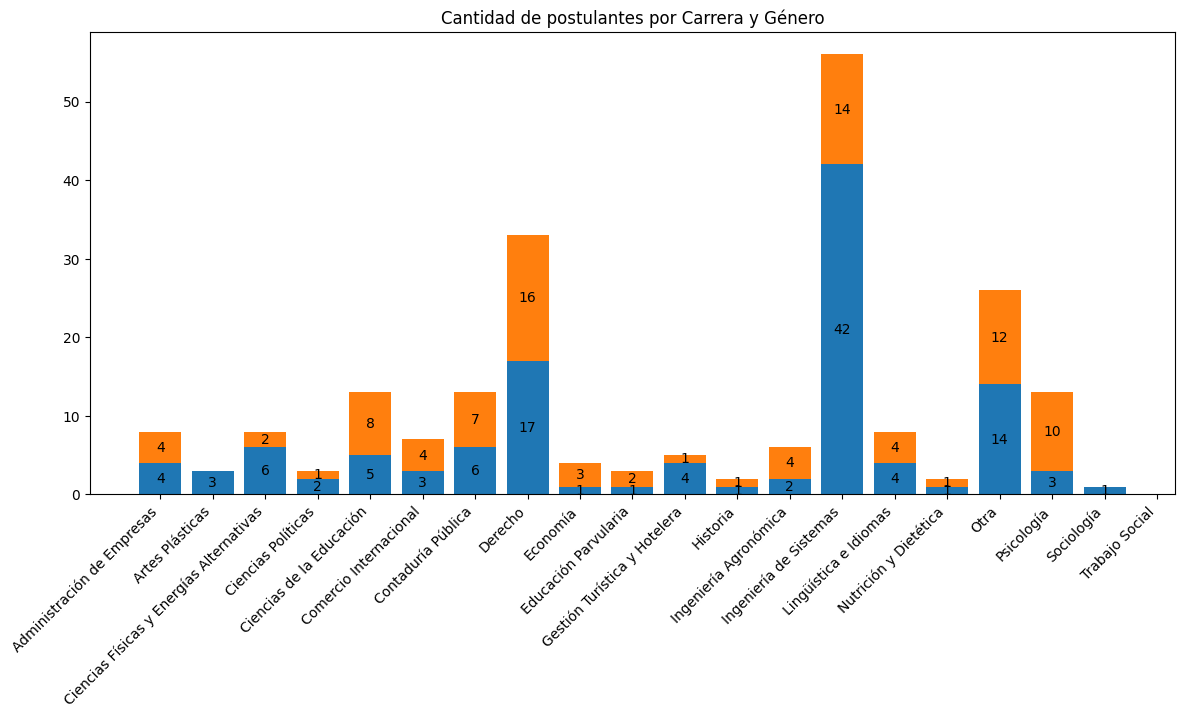

In [6]:
#Visualización
#1
fig, ax = plt.subplots(figsize=(14, 6))
#1
bottom = np.zeros(len(carreras)) #Con len(carreras) obtenemos la cantidad de carreras que hay

#3 Creamos las barras agrupadas
for column in lista_columnas:
    
    data = ax.bar(carreras, df_agrupacion_carrera_genero[column], label=column, bottom=bottom)
    bottom += df_agrupacion_carrera_genero[column]
    ax.bar_label(data, label_type='center')

#4 
for label in ax.get_xticklabels():
    label.set_rotation(45)
    label.set_horizontalalignment('right')
 

#5
ax.set_title('Cantidad de postulantes por Carrera y Género')